In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
Nrnd = 10000
x = -1+2*np.random.random(size=Nrnd)
y = -1+2*np.random.random(size=Nrnd)

We distribute 10,000 random particles in a square of side=2

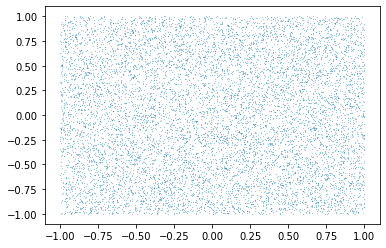

In [3]:
plt.scatter(x,y, s=0.1, marker='.')

In an area $dA$ the average number of particles will be $N(dA)=\rho dA$, with $\rho = N_{tot}/A_{tot} = 10,000/4$

So in any point in this square, sufficiently away from the edge, we can select a circle of radius $r$ and the number of particles inside of that circle will be: $N(r) = \rho \pi r^{2}$ (since $\pi r^{2}$ is the area of the circle).

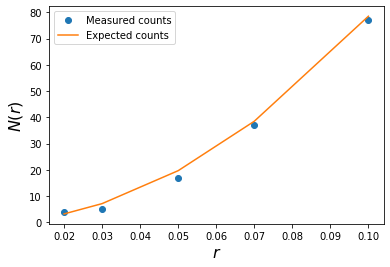

In [4]:
# Let's count in different circles centered at 0,0
r = np.array([0.02, 0.03, 0.05, 0.07, 0.1])
n_r = []
#define our variables
side=2
Atot = side**2
rho = Nrnd/Atot
#now plot!
for i in range(len(r)):
    n_r.append(np.count_nonzero((x**2+y**2) < r[i]**2)) # x**2+y**2 is the distance to the center!
    #print(n_r[i])
plt.plot(r, n_r, 'o', label='Measured counts')
plt.plot(r, rho*np.pi*r**2, label='Expected counts')
plt.xlabel('$r$', fontsize=16)
plt.ylabel('$N(r)$', fontsize=16)
plt.legend(loc='best')

So, if for every particle we measure the distance with its neighbors, and then count the number of pairs within a certain distance we get that $N_{pairs}(r) = \rho \pi r^{2}$, and the number of neighbors between $r$ and $r+dr$ will be: $N_{pairs} (r, r+dr) = \rho \pi ((r+dr)^{2}-r^{2})$ (area of the big circle with radius $r+dr$ minus the area of the small circle of radius $r$). The total number of pairs will be $N_{pairs, tot} (r, r+dr) = N_{tot}\rho \pi ((r+dr)^{2}-r^{2})$.

In [5]:
# So now, let's compute the distance between each particle and the rest (note that we are avoiding double counting)
distances = []
for i in range(x.size):
    distances.append(np.sqrt((x[i+1:]-x[i])**2+(y[i+1:]-y[i])**2)) # Distances is going to be a list of lists

In [6]:
distances = np.concatenate(distances) # We convert to a single list

Text(0, 0.5, '$N_{pairs}$')

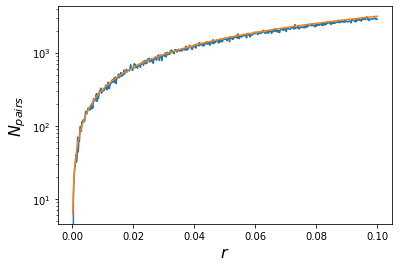

In [7]:
hist, be = np.histogram(distances, range=(0,0.1), bins=500)
sep_dist = 0.5*(be[1:]+be[:-1])
dsep = sep_dist[1]-sep_dist[0]
N_dist = Nrnd*rho*np.pi*(2*sep_dist*dsep+dsep**2)
plt.plot(sep_dist, hist*2.0, label='Counted randoms') # We multiply times 2 because in the formula we are double-counting but in our computations we weren't to speed-up the process
plt.plot(sep_dist, N_dist, label='Expected number of pairs')
plt.yscale('log')
plt.xlabel('$r$', fontsize=16)
plt.ylabel('$N_{pairs}$', fontsize=16)

So we got a pretty good match! You can check that at larger distances this expression starts to fail, since we start to miss pairs due to the fact that we have a finite area:

Text(0, 0.5, '$N_{pairs}$')

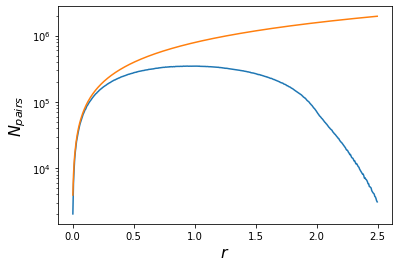

In [8]:
hist, be = np.histogram(distances, range=(0,2.5), bins=500)
sep_dist = 0.5*(be[1:]+be[:-1])
dsep = sep_dist[1]-sep_dist[0]
N_dist = 10000*10000/4*np.pi*(2*sep_dist*dsep+dsep**2)
plt.plot(sep_dist, hist*2.0, label='Counted randoms') # We multiply times 2 because in the formula we are double-counting but in our computations we weren't to speed-up the process
plt.plot(sep_dist, N_dist, label='Expected number of pairs')
plt.yscale('log')
plt.xlabel('$r$', fontsize=16)
plt.ylabel('$N_{pairs}$', fontsize=16)

If, instead we were in a 3D space, the number of particles in a sphere would grow as $r^{3}$, and if we were in another type of geometry we would have that the number of particles grows as $r^{D}$, where $D$ is the dimensionality of our geometry (if $D$ is not integer we say that we are in a fractal geometry).

It seems that counting particles in a volume can give us information about properties in the "Universe" so, what happens with galaxies? Are they randomly placed?

Let's read a galaxy catalog (you will need to download the file containing the galaxies) 

In [9]:
import astropy.table

In [10]:
galaxy_catalog = astropy.table.Table.read('../../Downloads/DES_Y1/DES_Y1A1_3x2pt_redMaGiC_zerr_CATALOG.fits')

In [11]:
randoms = astropy.table.Table.read('../../Downloads/DES_Y1/DES_Y1A1_3x2pt_redMaGiC_RANDOMS.fits')

In [12]:
galaxy_catalog

ID,RA,DEC,ZREDMAGIC,ZREDMAGIC_E,weight
int64,float64,float64,float64,float64,float64
3050237433,76.650392,-56.996598999999996,0.15000873804092407,0.009599748998880386,1.0518749041881807
3119536009,10.657494,-44.892612,0.15001007914543152,0.009512721560895443,0.9116565343763681
3043842585,81.91700399999999,-56.612052,0.15001313388347626,0.008652795106172562,0.937037842819539
3034628499,89.812164,-52.779491,0.15003438293933868,0.008681152947247028,1.0765682932609613
3059228029,71.135057,-51.074555,0.15004366636276245,0.008685193955898285,1.0483407377399345
3119296447,11.913672,-42.342889,0.150051087141037,0.008591028861701488,0.9637158950961029
3081078666,52.842355,-57.074867,0.1500576287508011,0.008494282141327858,0.9172346213290467
3075699929,57.693298999999996,-48.650023999999995,0.15006199479103088,0.00815124623477459,0.8921034874761404
3090139698,43.089594999999996,-43.859265,0.1500651091337204,0.009136755019426346,0.942256255747899


In [13]:
randoms

RA,DEC,Z
float64,float64,float64
41.692270294287454,-58.98718403712837,0.24745970964431763
36.77795749607401,-51.84980048325267,0.2217683345079422
339.5328535718957,-44.471489843169685,0.21070513129234314
33.40033662555558,-44.48346859445136,0.2435688078403473
17.515891160998592,-53.47122949217932,0.1965993493795395
331.7096743815408,-51.22179089380359,0.1691570281982422
14.232849092258903,-51.5120200082573,0.17921394109725952
353.5788414842742,-54.77861050868338,0.29278695583343506
27.48505533789836,-43.57988746336967,0.22742152214050293


We measure the positions of galaxies in Celestial (equatorial) coordinates. A point in the celesital sphere is characterized by two coordinates: RA (right ascension) and Dec (declination). These are the coordinates that we are going to use in our studies. You can think of them as the $\theta, \phi$ of the typical spherical coordinates.

These catalogs also include a column named $z$. What is $z$? $z$ is the estimated redshift.

There's a lot of information about redshifts here: http://voyages.sdss.org/preflight/light/redshift/. Please check it out!

What is redshift? 

The relative motion between any wave source and an observer causes an effect known as "Doppler shift"

Picture from Wikipedia:
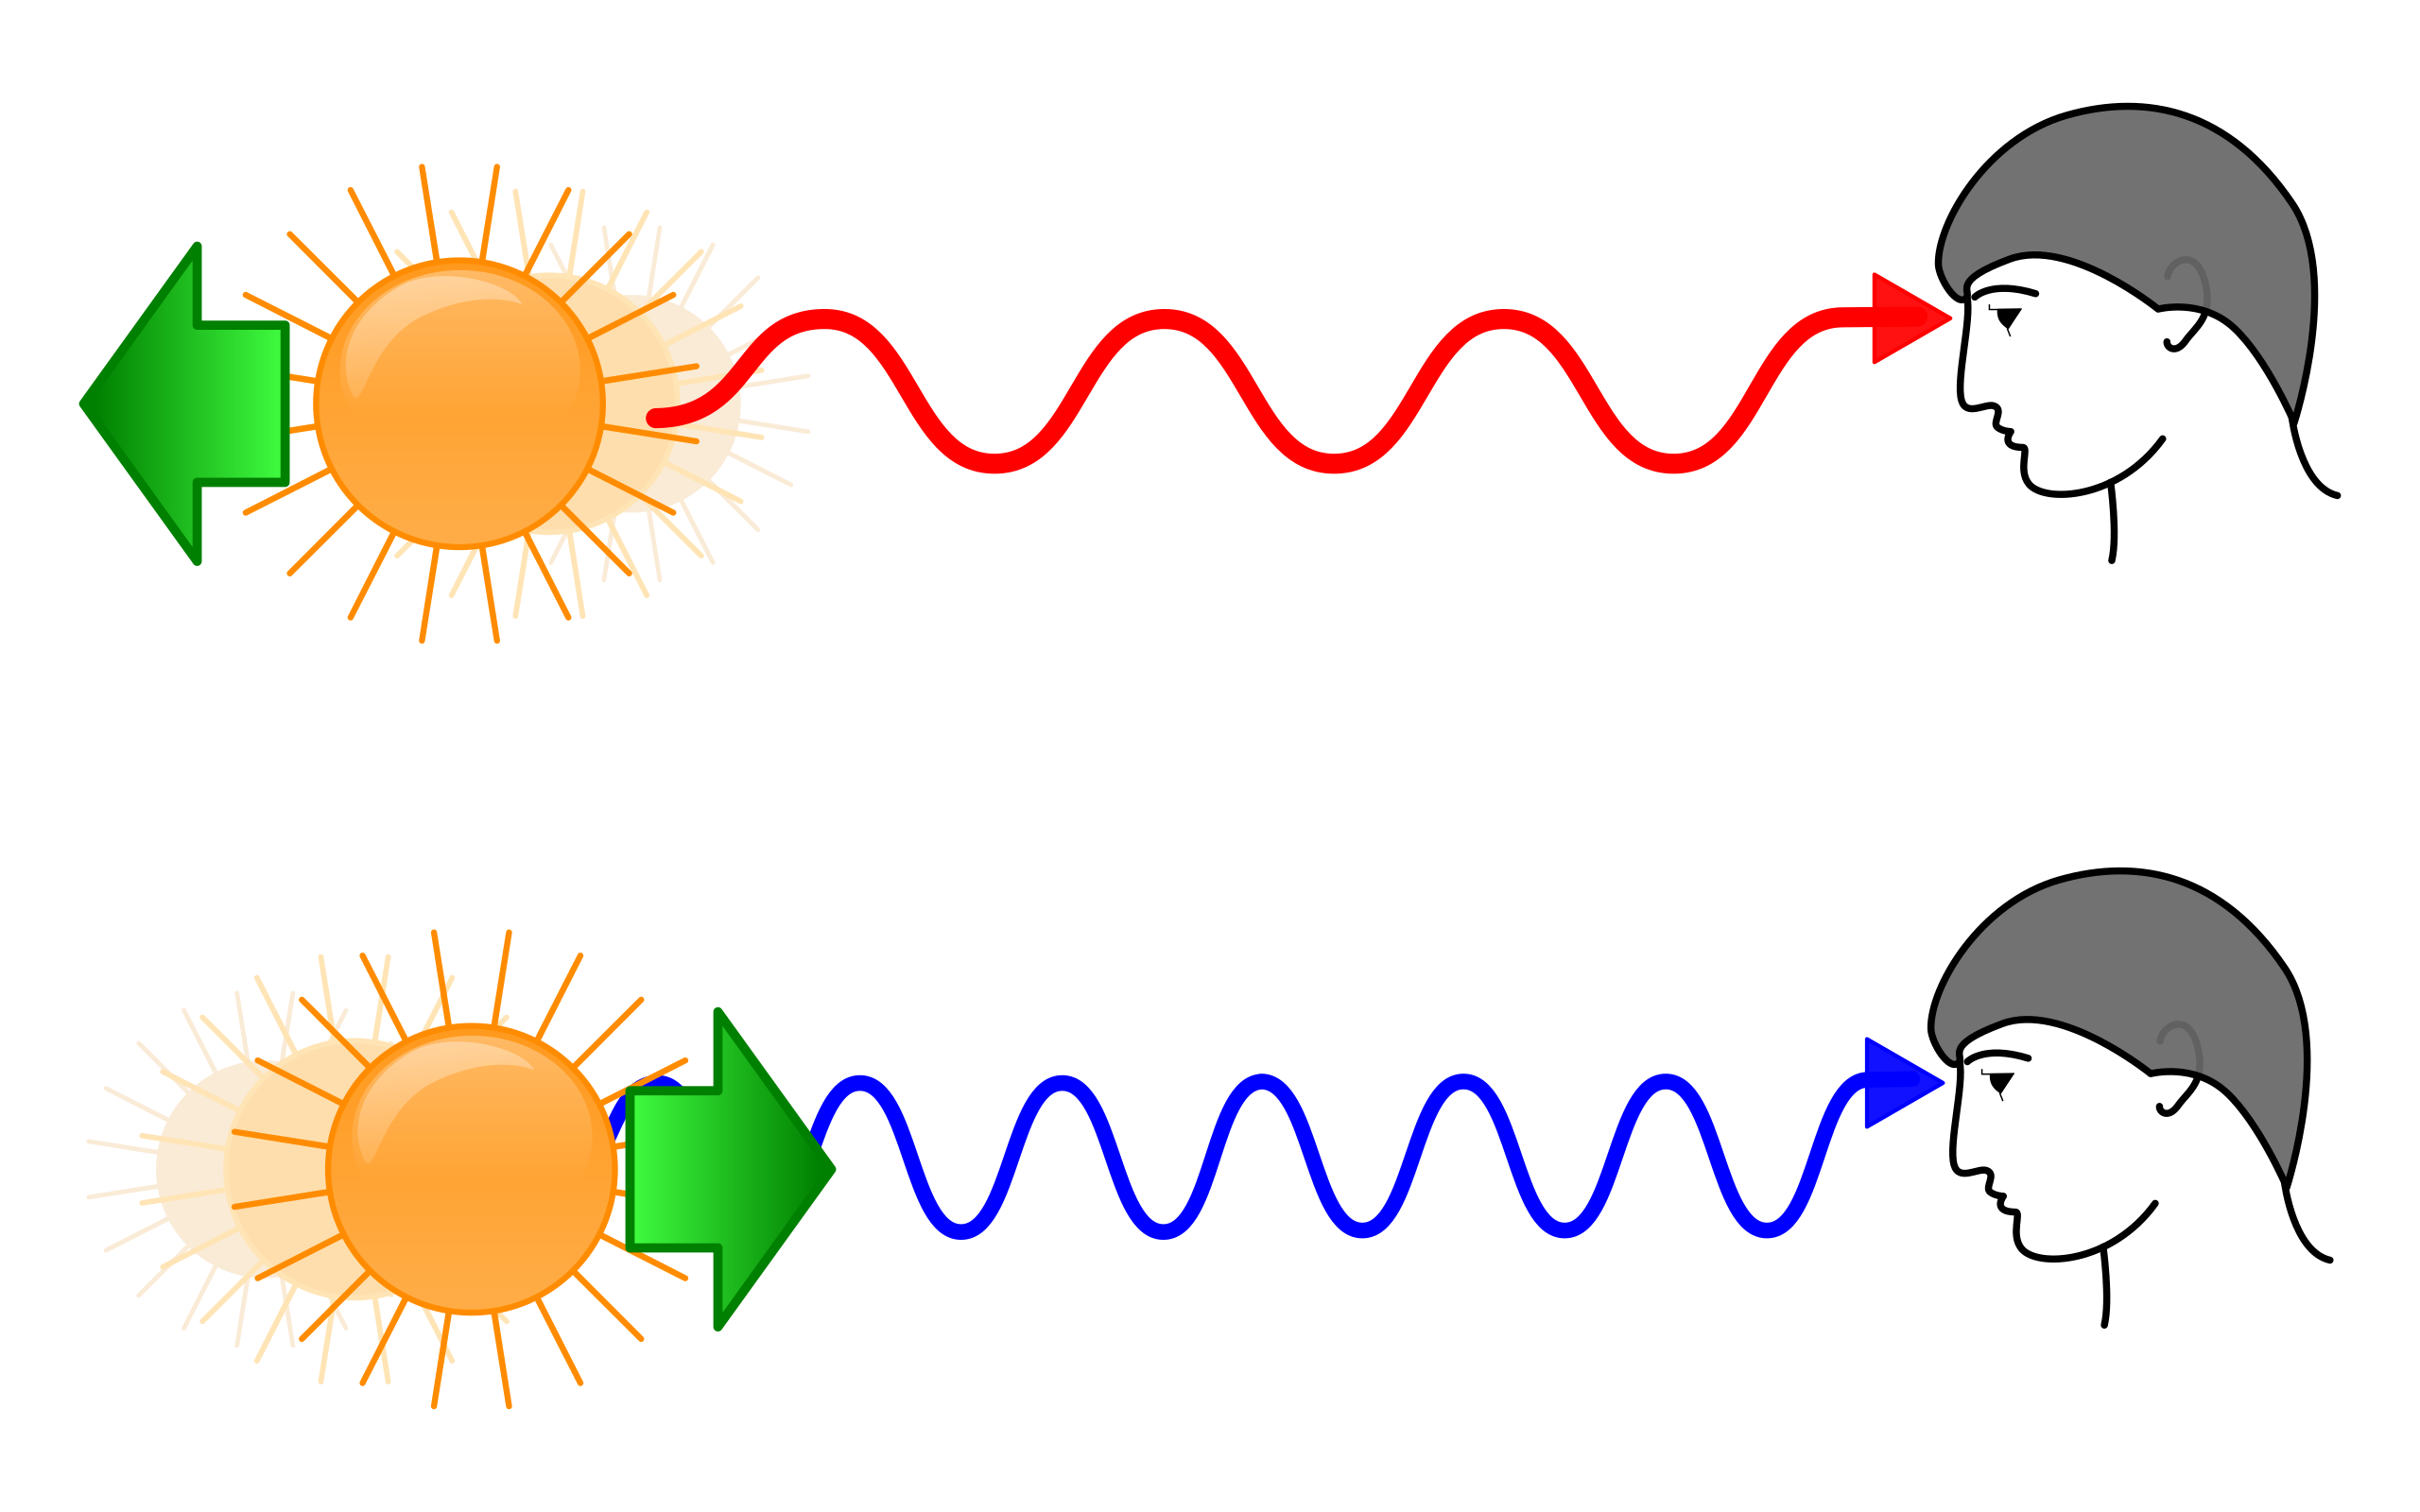

* In top the picture the Sun is moving away from the observer. The observer, perceives the sunlight redder than in the case that was in rest with respect to the Sun. The sunlight in this case suffers what is known as "redshift". 

* In the bottom picture, the Sun is moving towards the observer and, as a consequence, the observer perceives the sunlight bluer. This effect is known as "blueshift"

Formally speaking we have that:

$z = 1 + f_{emit}/f_{obs}$, where $f_{emit}$ is the frequency of the emmitted light (wave) and $f_{obs}$ is the observed frequency.

(Note: high-frequency $\rightarrow$ bluer; low-frequency $\rightarrow$ redder.)

If we consider objects that are moving at much slower speeds that the speed of light we can write:

$z \approx \frac{v_{\parallel}}{c}$, where $v_{\parallel}$ is the speed of the moving object in the direction parallel to the line-of-sight, and $c$ is the speed of light.

So, essentially redshift/blueshift tells us how fast things are moving, right? Yes!

However, in cosmology we identify these velocities with "distances".

You may be wondering, how?!

Since the universe is expanding in an accelerated fashion, the velocities change with time, so things that are at a larger distance (i.e., the light was emitted a long time ago and has been accelerating since) will appear to us as going away from us faster than things that are nearby (the light was emitted in a closer time to our present $z=0$).

In cosmology then we write:

$z = \frac{a_{now}}{a_{then}} - 1$. Where $a$ is the scale factor, which tell us how distances change with time.



We want to have as much information as we can about the evolution in redshift of the galaxies, however, our redshift estimations are not very accurate (due to the fact that we use photometry and not spectra).

To learn more about the differences between photometry and spectroscopy you can check these sites: http://voyages.sdss.org/preflight/light/spectra/ and http://voyages.sdss.org/preflight/light/filters/

We usually divide our galaxy sample in different redshift slices (tomographic bins).

In [68]:
galaxy_z_slice = (galaxy_catalog['ZREDMAGIC'] > 0.4) & (galaxy_catalog['ZREDMAGIC'] < 0.42)
random_z_slice = (randoms['Z'] > 0.4) & (randoms['Z'] < 0.42)

25108 1412808


Now we repeat the same calculation as in the first example

In [105]:
galaxy_distances = []
x = galaxy_catalog['RA'][galaxy_z_slice]
y = galaxy_catalog['DEC'][galaxy_z_slice]
Ng = 1.0*len(x)
for i in range(x.size):
    galaxy_distances.append(np.sqrt((x[i+1:]-x[i])**2+
                                    (y[i+1:]-y[i])**2))
galaxy_distances = np.concatenate(galaxy_distances)

In [106]:
random_distances = []
x = randoms['RA'][random_z_slice][::100] # We are subsampling in the random catalog so the notebook works faster
y = randoms['DEC'][random_z_slice][::100]
Nrnd = 1.0*len(x)
for i in range(x.size):
    random_distances.append(np.sqrt((x[i+1:]-x[i])**2+
                                    (y[i+1:]-y[i])**2))
random_distances = np.concatenate(random_distances)

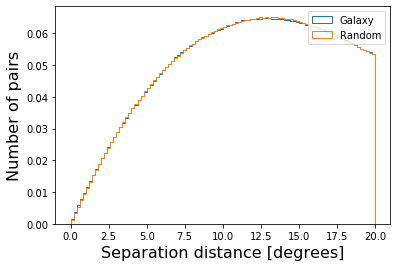

In [107]:
plt.hist(galaxy_distances, range=(0, 20), bins=100, histtype='step', density=True, label='Galaxy')
plt.hist(random_distances, range=(0, 20), bins=100, histtype='step', density=True, label='Random')
plt.xlabel('Separation distance [degrees]', fontsize=16)
plt.ylabel('Number of pairs', fontsize=16)
plt.legend(loc='best')

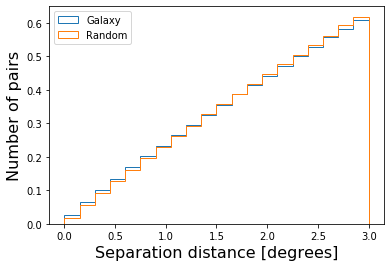

In [108]:
plt.hist(galaxy_distances, range=(0, 3), bins=20, histtype='step', density=True, label='Galaxy')
plt.hist(random_distances, range=(0, 3), bins=20, histtype='step', density=True, label='Random')
plt.xlabel('Separation distance [degrees]', fontsize=16)
plt.ylabel('Number of pairs', fontsize=16)
plt.legend(loc=2)

Text(0, 0.5, 'Correlation function, $w(\\theta)$')

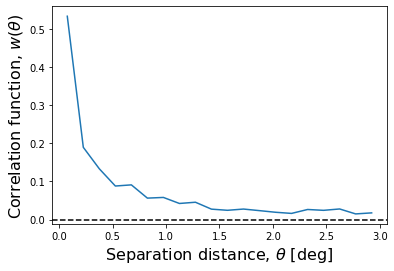

In [111]:
ng, bin_edges = np.histogram(galaxy_distances, range=(0, 3), bins=20)
nr, bin_edges = np.histogram(random_distances, range=(0, 3), bins=20)
ng = ng*2.0
nr = nr*2.0 # This is because we have the pair ij but also the pair ji
bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1])
plt.plot(bin_centers, Nrnd**2/Ng**2*ng/nr-1)
plt.axhline(0, ls='--', c='k')
plt.xlabel(r'Separation distance, $\theta$ [deg]', fontsize=16)
plt.ylabel(r'Correlation function, $w(\theta)$', fontsize=16)

You can see that computing the correlation function this way is a slow process -- $\mathcal{O}(N^{2})$ -- that is why we generally use some computational tricks to speed up this calculation. 

This way to compute the correlation function is using the so-called, natural estimator (see more [here](https://arxiv.org/pdf/astro-ph/9912088.pdf)):

$$w_{N}(\theta) = \frac{N_{r}}{N_{g}}\frac{DD(\theta)}{RR(\theta)} - 1$$

Where $DD(\theta)$ is the number of galaxy (data) pairs at a distance $\theta$ (so each of the entries of the histogram of `galaxy_distances`), and $RR(\theta)$ is the number of random pairs at a distance $\theta$, $N_{g}$ is the total number of galaxies in the considered catalog (in our case our redshift slice) and $N_{r}$ the number of randoms points in the random catalog (in our case our redshift slice). 

The correlation function tells us the excess probability of finding a pair of objects at a certain distance compared to a random distribution. It is usually written as $\xi(r)$ (in 3D, when you have accurate redshift measurements) or $w(\theta)$ (in 2D, as in our case when we use images of galaxies in different wide filters to estimate their distance to us).

The most commonly used estimator of the correlation function is galaxy surveys is the [Landy & Szalay estimator](http://articles.adsabs.harvard.edu/pdf/1993ApJ...412...64L). In the graph below you can see that both the galaxy bins and the random bins fluctuate a little bit due to the fact that we have a finite number of galaxies and random particles to compute our correlation function. Since we are dividing two noisy quantities, fluctuations may become enhanced. In order to avoid this, we add another term to the calculation, which is the distribution of distances between galaxies and random particles, $DR(\theta)$:

$$w_{LS}(\theta) = \frac{N_{rnd}^{2}}{N_{gal}^{2}}\frac{DD(\theta)}{RR(\theta)}-2\frac{N_{rnd}}{N_{g}}\frac{DR(\theta)}{RR(\theta)} + 1$$

In [112]:
galaxy_random_distances = []
x = galaxy_catalog['RA'][galaxy_z_slice]
y = galaxy_catalog['DEC'][galaxy_z_slice]
xr = randoms['RA'][random_z_slice][::100] # We are subsampling in the random catalog so the notebook works faster
yr = randoms['DEC'][random_z_slice][::100]
for i in range(x.size):
    galaxy_random_distances.append(np.sqrt((xr-x[i])**2+
                                    (yr-y[i])**2))
galaxy_random_distances = np.concatenate(galaxy_random_distances)

In [113]:
nrg, bin_edges = np.histogram(galaxy_random_distances, range=(0, 3), bins=20)

Let's compare the results between our estimators:

Text(0, 0.5, 'Correlation function, $w(\\theta)$')

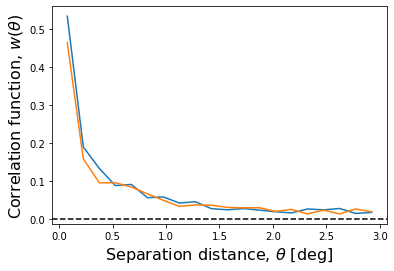

In [114]:
plt.plot(bin_centers, Nrnd**2/Ng**2*ng*1.0/nr-1, label='Natural estimator')
plt.plot(bin_centers, Nrnd**2/Ng**2*ng*1.0/nr-2*Nrnd/Ng*nrg*1.0/nr+1, label='LS estimator')
plt.axhline(0, ls='--', c='k')
plt.xlabel(r'Separation distance, $\theta$ [deg]', fontsize=16)
plt.ylabel(r'Correlation function, $w(\theta)$', fontsize=16)